# Parser for MINCUT-MAXFLOW algorithm
This script does the following;
1. extracts the required (1) flow-data and (2) node-data, 
2. builds a graph network using networkx, 
3. executes MINCUT-MAXFLOW algorithm,  
4. and exports a CSV with the results.

#### 1. Load data into dictionary from .csv with the following __schedule__;

edge_id,source_name,sink_name,source_lat,source_lon,sink_lat,sink_lon,record_count,scheduled,abs_median_deviation,relative_deviation_factor,flow

In [1]:
import csv
import os

# Establish dictionary for edges
edges = {}

# Load data about each edge in Uppsala Network (UL)
with open('./data/ul_edge_flows.csv') as file:
    reader1 = csv.DictReader(file)
    # Create dictionary key for each row in the csv with values on name, latitude and longitude
    for row in reader1:
        edges[row['edge_id']] = dict(row)

In [2]:
# Establish dictionary for stops / nodes
stops = {}

# Variable precision – to cluster nodes by only looking at the 13 first characters
ci=13

# Directory where the static network data is located
directory = '../../data/static/'

# Load data about all stops (nodes) in the Uppsala Network (UL)
for mapp in os.listdir(directory):
    print("Reading directory",mapp)
    
    try:
        with open(directory + mapp + '/stops.txt') as file:
            reader2 = csv.DictReader(file)
            # Create dictionary key for each row in stops.csv with values on name, latitude and longitude
            
            for row in reader2:
                if (row['stop_id'][0:ci] not in stops):
                    print("\t","Stop",row['stop_id'][0:ci],"added to stops dictionary")
                    stops[row['stop_id'][0:ci]] = {'stop_id': row['stop_id'][0:ci], 'stop_name': row['stop_name'],
                                             'stop_lat': row['stop_lat'], 'stop_lon': row['stop_lon']}
    except NotADirectoryError:
        continue


Reading directory .DS_Store
Reading directory 20
	 Stop 9021003760429 added to stops dictionary
	 Stop 9021003780538 added to stops dictionary
	 Stop 9021003099801 added to stops dictionary
	 Stop 9021003099802 added to stops dictionary
	 Stop 9021003099803 added to stops dictionary
	 Stop 9021003099804 added to stops dictionary
	 Stop 9021003099812 added to stops dictionary
	 Stop 9021003781082 added to stops dictionary
	 Stop 9021003092000 added to stops dictionary
	 Stop 9021003099823 added to stops dictionary
	 Stop 9021003099701 added to stops dictionary
	 Stop 9021003099121 added to stops dictionary
	 Stop 9021003099131 added to stops dictionary
	 Stop 9021003099141 added to stops dictionary
	 Stop 9021003779013 added to stops dictionary
	 Stop 9021003779040 added to stops dictionary
	 Stop 9021003780124 added to stops dictionary
	 Stop 9021003780126 added to stops dictionary
	 Stop 9021003780206 added to stops dictionary
	 Stop 9021003780505 added to stops dictionary
	 Stop 9021

	 Stop 9021003782322 added to stops dictionary
	 Stop 9021003782323 added to stops dictionary
	 Stop 9021003782324 added to stops dictionary
	 Stop 9021003782325 added to stops dictionary
	 Stop 9021003782326 added to stops dictionary
	 Stop 9021003782327 added to stops dictionary
	 Stop 9021003782328 added to stops dictionary
	 Stop 9021003782329 added to stops dictionary
	 Stop 9021003782330 added to stops dictionary
	 Stop 9021003782332 added to stops dictionary
	 Stop 9021003782333 added to stops dictionary
	 Stop 9021003782334 added to stops dictionary
	 Stop 9021003782335 added to stops dictionary
	 Stop 9021003782336 added to stops dictionary
	 Stop 9021003782337 added to stops dictionary
	 Stop 9021003782338 added to stops dictionary
	 Stop 9021003782339 added to stops dictionary
	 Stop 9021003782340 added to stops dictionary
	 Stop 9021003782341 added to stops dictionary
	 Stop 9021003782342 added to stops dictionary
	 Stop 9021003782343 added to stops dictionary
	 Stop 902100

	 Stop 9021003781221 added to stops dictionary
	 Stop 9021003781222 added to stops dictionary
	 Stop 9021003781223 added to stops dictionary
	 Stop 9021003781224 added to stops dictionary
	 Stop 9021003781225 added to stops dictionary
	 Stop 9021003781226 added to stops dictionary
	 Stop 9021003781227 added to stops dictionary
	 Stop 9021003781228 added to stops dictionary
	 Stop 9021003781229 added to stops dictionary
	 Stop 9021003781231 added to stops dictionary
	 Stop 9021003781232 added to stops dictionary
	 Stop 9021003781233 added to stops dictionary
	 Stop 9021003781234 added to stops dictionary
	 Stop 9021003781235 added to stops dictionary
	 Stop 9021003781236 added to stops dictionary
	 Stop 9021003781237 added to stops dictionary
	 Stop 9021003781238 added to stops dictionary
	 Stop 9021003781239 added to stops dictionary
	 Stop 9021003781240 added to stops dictionary
	 Stop 9021003781241 added to stops dictionary
	 Stop 9021003781242 added to stops dictionary
	 Stop 902100

	 Stop 9021003781727 added to stops dictionary
	 Stop 9021003781728 added to stops dictionary
	 Stop 9021003781729 added to stops dictionary
	 Stop 9021003781730 added to stops dictionary
	 Stop 9021003781731 added to stops dictionary
	 Stop 9021003781732 added to stops dictionary
	 Stop 9021003781733 added to stops dictionary
	 Stop 9021003781734 added to stops dictionary
	 Stop 9021003781736 added to stops dictionary
	 Stop 9021003781737 added to stops dictionary
	 Stop 9021003781738 added to stops dictionary
	 Stop 9021003781739 added to stops dictionary
	 Stop 9021003781740 added to stops dictionary
	 Stop 9021003781742 added to stops dictionary
	 Stop 9021003781743 added to stops dictionary
	 Stop 9021003781744 added to stops dictionary
	 Stop 9021003781745 added to stops dictionary
	 Stop 9021003781747 added to stops dictionary
	 Stop 9021003781749 added to stops dictionary
	 Stop 9021003781750 added to stops dictionary
	 Stop 9021003781751 added to stops dictionary
	 Stop 902100

	 Stop 9021003191219 added to stops dictionary
	 Stop 9021003191220 added to stops dictionary
	 Stop 9021003191221 added to stops dictionary
	 Stop 9021003191222 added to stops dictionary
	 Stop 9021003191223 added to stops dictionary
	 Stop 9021003191224 added to stops dictionary
	 Stop 9021003191225 added to stops dictionary
	 Stop 9021003191226 added to stops dictionary
	 Stop 9021003191227 added to stops dictionary
	 Stop 9021003191228 added to stops dictionary
	 Stop 9021003191229 added to stops dictionary
	 Stop 9021003191230 added to stops dictionary
	 Stop 9021003191231 added to stops dictionary
	 Stop 9021003191233 added to stops dictionary
	 Stop 9021003191234 added to stops dictionary
	 Stop 9021003191237 added to stops dictionary
	 Stop 9021003191238 added to stops dictionary
	 Stop 9021003191239 added to stops dictionary
	 Stop 9021003191240 added to stops dictionary
	 Stop 9021003191242 added to stops dictionary
	 Stop 9021003191243 added to stops dictionary
	 Stop 902100

	 Stop 9021003760252 added to stops dictionary
	 Stop 9021003760253 added to stops dictionary
	 Stop 9021003760254 added to stops dictionary
	 Stop 9021003760255 added to stops dictionary
	 Stop 9021003760256 added to stops dictionary
	 Stop 9021003760257 added to stops dictionary
	 Stop 9021003760258 added to stops dictionary
	 Stop 9021003760259 added to stops dictionary
	 Stop 9021003760260 added to stops dictionary
	 Stop 9021003760261 added to stops dictionary
	 Stop 9021003760262 added to stops dictionary
	 Stop 9021003760263 added to stops dictionary
	 Stop 9021003760264 added to stops dictionary
	 Stop 9021003760265 added to stops dictionary
	 Stop 9021003760266 added to stops dictionary
	 Stop 9021003760267 added to stops dictionary
	 Stop 9021003760268 added to stops dictionary
	 Stop 9021003760269 added to stops dictionary
	 Stop 9021003760270 added to stops dictionary
	 Stop 9021003760271 added to stops dictionary
	 Stop 9021003760272 added to stops dictionary
	 Stop 902100

	 Stop 9021003793060 added to stops dictionary
	 Stop 9021003793061 added to stops dictionary
	 Stop 9021003793062 added to stops dictionary
	 Stop 9021003793063 added to stops dictionary
	 Stop 9021003793064 added to stops dictionary
	 Stop 9021003793065 added to stops dictionary
	 Stop 9021003793066 added to stops dictionary
	 Stop 9021003793067 added to stops dictionary
	 Stop 9021003793070 added to stops dictionary
	 Stop 9021003793071 added to stops dictionary
	 Stop 9021003793073 added to stops dictionary
	 Stop 9021003793075 added to stops dictionary
	 Stop 9021003793078 added to stops dictionary
	 Stop 9021003793081 added to stops dictionary
	 Stop 9021003793082 added to stops dictionary
	 Stop 9021003793083 added to stops dictionary
	 Stop 9021003793084 added to stops dictionary
	 Stop 9021003793085 added to stops dictionary
	 Stop 9021003793086 added to stops dictionary
	 Stop 9021003793088 added to stops dictionary
	 Stop 9021003793089 added to stops dictionary
	 Stop 902100

	 Stop 9021003779051 added to stops dictionary
	 Stop 9021003779052 added to stops dictionary
	 Stop 9021003779053 added to stops dictionary
	 Stop 9021003779054 added to stops dictionary
	 Stop 9021003779056 added to stops dictionary
	 Stop 9021003779057 added to stops dictionary
	 Stop 9021003779058 added to stops dictionary
	 Stop 9021003779059 added to stops dictionary
	 Stop 9021003779060 added to stops dictionary
	 Stop 9021003779061 added to stops dictionary
	 Stop 9021003779062 added to stops dictionary
	 Stop 9021003779063 added to stops dictionary
	 Stop 9021003779064 added to stops dictionary
	 Stop 9021003779065 added to stops dictionary
	 Stop 9021003779069 added to stops dictionary
	 Stop 9021003779072 added to stops dictionary
	 Stop 9021003779074 added to stops dictionary
	 Stop 9021003779075 added to stops dictionary
	 Stop 9021003779077 added to stops dictionary
	 Stop 9021003779080 added to stops dictionary
	 Stop 9021003779081 added to stops dictionary
	 Stop 902100

	 Stop 9021003780080 added to stops dictionary
	 Stop 9021003780081 added to stops dictionary
	 Stop 9021003780082 added to stops dictionary
	 Stop 9021003780083 added to stops dictionary
	 Stop 9021003780084 added to stops dictionary
	 Stop 9021003780085 added to stops dictionary
	 Stop 9021003780087 added to stops dictionary
	 Stop 9021003780088 added to stops dictionary
	 Stop 9021003780089 added to stops dictionary
	 Stop 9021003780090 added to stops dictionary
	 Stop 9021003780091 added to stops dictionary
	 Stop 9021003780092 added to stops dictionary
	 Stop 9021003780093 added to stops dictionary
	 Stop 9021003780094 added to stops dictionary
	 Stop 9021003780095 added to stops dictionary
	 Stop 9021003780096 added to stops dictionary
	 Stop 9021003780097 added to stops dictionary
	 Stop 9021003780098 added to stops dictionary
	 Stop 9021003780099 added to stops dictionary
	 Stop 9021003780100 added to stops dictionary
	 Stop 9021003780101 added to stops dictionary
	 Stop 902100

	 Stop 9021003780718 added to stops dictionary
	 Stop 9021003780719 added to stops dictionary
	 Stop 9021003780720 added to stops dictionary
	 Stop 9021003780721 added to stops dictionary
	 Stop 9021003780722 added to stops dictionary
	 Stop 9021003780723 added to stops dictionary
	 Stop 9021003780724 added to stops dictionary
	 Stop 9021003780725 added to stops dictionary
	 Stop 9021003780726 added to stops dictionary
	 Stop 9021003780727 added to stops dictionary
	 Stop 9021003780728 added to stops dictionary
	 Stop 9021003780729 added to stops dictionary
	 Stop 9021003780730 added to stops dictionary
	 Stop 9021003780731 added to stops dictionary
	 Stop 9021003780732 added to stops dictionary
	 Stop 9021003780733 added to stops dictionary
	 Stop 9021003780735 added to stops dictionary
	 Stop 9021003780736 added to stops dictionary
	 Stop 9021003780737 added to stops dictionary
	 Stop 9021003780738 added to stops dictionary
	 Stop 9021003780739 added to stops dictionary
	 Stop 902100

	 Stop 9022003781109 added to stops dictionary
	 Stop 9022003781110 added to stops dictionary
	 Stop 9022003781111 added to stops dictionary
	 Stop 9022003781112 added to stops dictionary
	 Stop 9022003781113 added to stops dictionary
	 Stop 9022003781114 added to stops dictionary
	 Stop 9022003781115 added to stops dictionary
	 Stop 9022003781116 added to stops dictionary
	 Stop 9022003781117 added to stops dictionary
	 Stop 9022003781118 added to stops dictionary
	 Stop 9022003781119 added to stops dictionary
	 Stop 9022003781120 added to stops dictionary
	 Stop 9022003781122 added to stops dictionary
	 Stop 9022003781123 added to stops dictionary
	 Stop 9022003781124 added to stops dictionary
	 Stop 9022003781125 added to stops dictionary
	 Stop 9022003781126 added to stops dictionary
	 Stop 9022003781127 added to stops dictionary
	 Stop 9022003781128 added to stops dictionary
	 Stop 9022003781129 added to stops dictionary
	 Stop 9022003781130 added to stops dictionary
	 Stop 902200

	 Stop 9022003781653 added to stops dictionary
	 Stop 9022003781654 added to stops dictionary
	 Stop 9022003781655 added to stops dictionary
	 Stop 9022003781656 added to stops dictionary
	 Stop 9022003781657 added to stops dictionary
	 Stop 9022003781658 added to stops dictionary
	 Stop 9022003781659 added to stops dictionary
	 Stop 9022003781660 added to stops dictionary
	 Stop 9022003781661 added to stops dictionary
	 Stop 9022003781662 added to stops dictionary
	 Stop 9022003781663 added to stops dictionary
	 Stop 9022003781664 added to stops dictionary
	 Stop 9022003781665 added to stops dictionary
	 Stop 9022003781666 added to stops dictionary
	 Stop 9022003781667 added to stops dictionary
	 Stop 9022003781668 added to stops dictionary
	 Stop 9022003781669 added to stops dictionary
	 Stop 9022003781670 added to stops dictionary
	 Stop 9022003781671 added to stops dictionary
	 Stop 9022003781672 added to stops dictionary
	 Stop 9022003781673 added to stops dictionary
	 Stop 902200

	 Stop 9022003782405 added to stops dictionary
	 Stop 9022003782406 added to stops dictionary
	 Stop 9022003782407 added to stops dictionary
	 Stop 9022003782408 added to stops dictionary
	 Stop 9022003782409 added to stops dictionary
	 Stop 9022003782412 added to stops dictionary
	 Stop 9022003782413 added to stops dictionary
	 Stop 9022003782414 added to stops dictionary
	 Stop 9022003782417 added to stops dictionary
	 Stop 9022003782418 added to stops dictionary
	 Stop 9022003782419 added to stops dictionary
	 Stop 9022003782420 added to stops dictionary
	 Stop 9022003782421 added to stops dictionary
	 Stop 9022003782422 added to stops dictionary
	 Stop 9022003782423 added to stops dictionary
	 Stop 9022003782424 added to stops dictionary
	 Stop 9022003782426 added to stops dictionary
	 Stop 9022003782427 added to stops dictionary
	 Stop 9022003782428 added to stops dictionary
	 Stop 9022003782429 added to stops dictionary
	 Stop 9022003782430 added to stops dictionary
	 Stop 902200

	 Stop 9022003700597 added to stops dictionary
	 Stop 9022003700600 added to stops dictionary
	 Stop 9022003700602 added to stops dictionary
	 Stop 9022003700603 added to stops dictionary
	 Stop 9022003700604 added to stops dictionary
	 Stop 9022003700605 added to stops dictionary
	 Stop 9022003700607 added to stops dictionary
	 Stop 9022003700608 added to stops dictionary
	 Stop 9022003700610 added to stops dictionary
	 Stop 9022003700613 added to stops dictionary
	 Stop 9022003700615 added to stops dictionary
	 Stop 9022003700616 added to stops dictionary
	 Stop 9022003700617 added to stops dictionary
	 Stop 9022003700619 added to stops dictionary
	 Stop 9022003700620 added to stops dictionary
	 Stop 9022003700621 added to stops dictionary
	 Stop 9022003700622 added to stops dictionary
	 Stop 9022003700623 added to stops dictionary
	 Stop 9022003700626 added to stops dictionary
	 Stop 9022003700628 added to stops dictionary
	 Stop 9022003700629 added to stops dictionary
	 Stop 902200

	 Stop 9022003780094 added to stops dictionary
	 Stop 9022003780095 added to stops dictionary
	 Stop 9022003780096 added to stops dictionary
	 Stop 9022003780097 added to stops dictionary
	 Stop 9022003780098 added to stops dictionary
	 Stop 9022003780099 added to stops dictionary
	 Stop 9022003780100 added to stops dictionary
	 Stop 9022003780101 added to stops dictionary
	 Stop 9022003780102 added to stops dictionary
	 Stop 9022003780103 added to stops dictionary
	 Stop 9022003780104 added to stops dictionary
	 Stop 9022003780105 added to stops dictionary
	 Stop 9022003780106 added to stops dictionary
	 Stop 9022003780107 added to stops dictionary
	 Stop 9022003780108 added to stops dictionary
	 Stop 9022003780109 added to stops dictionary
	 Stop 9022003780110 added to stops dictionary
	 Stop 9022003780114 added to stops dictionary
	 Stop 9022003780118 added to stops dictionary
	 Stop 9022003780119 added to stops dictionary
	 Stop 9022003780120 added to stops dictionary
	 Stop 902200

	 Stop 9022003780464 added to stops dictionary
	 Stop 9022003780465 added to stops dictionary
	 Stop 9022003780466 added to stops dictionary
	 Stop 9022003780467 added to stops dictionary
	 Stop 9022003780468 added to stops dictionary
	 Stop 9022003780469 added to stops dictionary
	 Stop 9022003780470 added to stops dictionary
	 Stop 9022003780471 added to stops dictionary
	 Stop 9022003780472 added to stops dictionary
	 Stop 9022003780473 added to stops dictionary
	 Stop 9022003780474 added to stops dictionary
	 Stop 9022003780475 added to stops dictionary
	 Stop 9022003780476 added to stops dictionary
	 Stop 9022003780477 added to stops dictionary
	 Stop 9022003780478 added to stops dictionary
	 Stop 9022003780479 added to stops dictionary
	 Stop 9022003780480 added to stops dictionary
	 Stop 9022003780481 added to stops dictionary
	 Stop 9022003780482 added to stops dictionary
	 Stop 9022003780483 added to stops dictionary
	 Stop 9022003780484 added to stops dictionary
	 Stop 902200

	 Stop 9022003780753 added to stops dictionary
	 Stop 9022003780754 added to stops dictionary
	 Stop 9022003780755 added to stops dictionary
	 Stop 9022003780757 added to stops dictionary
	 Stop 9022003780758 added to stops dictionary
	 Stop 9022003780759 added to stops dictionary
	 Stop 9022003780760 added to stops dictionary
	 Stop 9022003780761 added to stops dictionary
	 Stop 9022003780762 added to stops dictionary
	 Stop 9022003780763 added to stops dictionary
	 Stop 9022003780764 added to stops dictionary
	 Stop 9022003780765 added to stops dictionary
	 Stop 9022003780766 added to stops dictionary
	 Stop 9022003780767 added to stops dictionary
	 Stop 9022003780768 added to stops dictionary
	 Stop 9022003780769 added to stops dictionary
	 Stop 9022003780770 added to stops dictionary
	 Stop 9022003780771 added to stops dictionary
	 Stop 9022003780772 added to stops dictionary
	 Stop 9022003780773 added to stops dictionary
	 Stop 9022003780774 added to stops dictionary
	 Stop 902200

	 Stop 9022003194003 added to stops dictionary
	 Stop 9022003194005 added to stops dictionary
	 Stop 9022003194006 added to stops dictionary
	 Stop 9022003194007 added to stops dictionary
	 Stop 9022003194008 added to stops dictionary
	 Stop 9022003194009 added to stops dictionary
	 Stop 9022003194010 added to stops dictionary
	 Stop 9022003194011 added to stops dictionary
	 Stop 9022003194012 added to stops dictionary
	 Stop 9022003194013 added to stops dictionary
	 Stop 9022003194014 added to stops dictionary
	 Stop 9022003194016 added to stops dictionary
	 Stop 9022003194018 added to stops dictionary
	 Stop 9022003194020 added to stops dictionary
	 Stop 9022003194021 added to stops dictionary
	 Stop 9022003194022 added to stops dictionary
	 Stop 9022003194023 added to stops dictionary
	 Stop 9022003194024 added to stops dictionary
	 Stop 9022003194025 added to stops dictionary
	 Stop 9022003194026 added to stops dictionary
	 Stop 9022003194027 added to stops dictionary
	 Stop 902200

	 Stop 9022003793057 added to stops dictionary
	 Stop 9022003793058 added to stops dictionary
	 Stop 9022003793059 added to stops dictionary
	 Stop 9022003793060 added to stops dictionary
	 Stop 9022003793061 added to stops dictionary
	 Stop 9022003793062 added to stops dictionary
	 Stop 9022003793063 added to stops dictionary
	 Stop 9022003793064 added to stops dictionary
	 Stop 9022003793065 added to stops dictionary
	 Stop 9022003793066 added to stops dictionary
	 Stop 9022003793067 added to stops dictionary
	 Stop 9022003793070 added to stops dictionary
	 Stop 9022003793071 added to stops dictionary
	 Stop 9022003793073 added to stops dictionary
	 Stop 9022003793075 added to stops dictionary
	 Stop 9022003793078 added to stops dictionary
	 Stop 9022003793081 added to stops dictionary
	 Stop 9022003793082 added to stops dictionary
	 Stop 9022003793083 added to stops dictionary
	 Stop 9022003793084 added to stops dictionary
	 Stop 9022003793085 added to stops dictionary
	 Stop 902200

	 Stop 9022003191011 added to stops dictionary
	 Stop 9022003191012 added to stops dictionary
	 Stop 9022003191013 added to stops dictionary
	 Stop 9022003191014 added to stops dictionary
	 Stop 9022003191015 added to stops dictionary
	 Stop 9022003191016 added to stops dictionary
	 Stop 9022003191017 added to stops dictionary
	 Stop 9022003191018 added to stops dictionary
	 Stop 9022003191019 added to stops dictionary
	 Stop 9022003191020 added to stops dictionary
	 Stop 9022003191021 added to stops dictionary
	 Stop 9022003191022 added to stops dictionary
	 Stop 9022003191023 added to stops dictionary
	 Stop 9022003191025 added to stops dictionary
	 Stop 9022003191026 added to stops dictionary
	 Stop 9022003191027 added to stops dictionary
	 Stop 9022003191028 added to stops dictionary
	 Stop 9022003191029 added to stops dictionary
	 Stop 9022003191030 added to stops dictionary
	 Stop 9022003191031 added to stops dictionary
	 Stop 9022003191032 added to stops dictionary
	 Stop 902200

	 Stop 9022003760051 added to stops dictionary
	 Stop 9022003760052 added to stops dictionary
	 Stop 9022003760053 added to stops dictionary
	 Stop 9022003760054 added to stops dictionary
	 Stop 9022003760055 added to stops dictionary
	 Stop 9022003760057 added to stops dictionary
	 Stop 9022003760058 added to stops dictionary
	 Stop 9022003760059 added to stops dictionary
	 Stop 9022003760060 added to stops dictionary
	 Stop 9022003760061 added to stops dictionary
	 Stop 9022003760062 added to stops dictionary
	 Stop 9022003760063 added to stops dictionary
	 Stop 9022003760064 added to stops dictionary
	 Stop 9022003760065 added to stops dictionary
	 Stop 9022003760066 added to stops dictionary
	 Stop 9022003760067 added to stops dictionary
	 Stop 9022003760068 added to stops dictionary
	 Stop 9022003760069 added to stops dictionary
	 Stop 9022003760070 added to stops dictionary
	 Stop 9022003760071 added to stops dictionary
	 Stop 9022003760072 added to stops dictionary
	 Stop 902200

	 Stop 9022003780756 added to stops dictionary
	 Stop 9022003780829 added to stops dictionary
	 Stop 9022003780832 added to stops dictionary
	 Stop 9022003098009 added to stops dictionary
	 Stop 9022003098013 added to stops dictionary
	 Stop 9022003782004 added to stops dictionary
	 Stop 9022003781210 added to stops dictionary
	 Stop 9022003781538 added to stops dictionary
	 Stop 9022003781539 added to stops dictionary
	 Stop 9022003781541 added to stops dictionary
	 Stop 9022003781542 added to stops dictionary
	 Stop 9022003781560 added to stops dictionary
	 Stop 9022003191002 added to stops dictionary
	 Stop 9022003191070 added to stops dictionary
	 Stop 9022003191071 added to stops dictionary
	 Stop 9022003191074 added to stops dictionary
	 Stop 9022003191076 added to stops dictionary
	 Stop 9022003191119 added to stops dictionary
	 Stop 9022003760427 added to stops dictionary
	 Stop 9022003760436 added to stops dictionary
	 Stop 9022003719117 added to stops dictionary
	 Stop 902200

In [39]:
edges

{'9022003799482/9022003780148': {'edge_id': '9022003799482/9022003780148',
  'source_id': '9022003799482',
  'sink_id': '9022003780148',
  'source_name': 'Karlsborg',
  'sink_name': 'Solvallen (Uppsala)',
  'source_lat': '59.984594',
  'source_lon': '17.593791',
  'sink_lat': '59.987757',
  'sink_lon': '17.592904',
  'median_deviation': '13',
  'scheduled_deviation': '17.695652173913043',
  'record_count': '46',
  'flow': '1.213981818181818'},
 '9022003799481/9022003780851': {'edge_id': '9022003799481/9022003780851',
  'source_id': '9022003799481',
  'sink_id': '9022003780851',
  'source_name': 'Torsbro (Ramsta)',
  'sink_name': 'Vissgärde (Uppsala)',
  'source_lat': '59.794627',
  'source_lon': '17.42852',
  'sink_lat': '59.795287',
  'sink_lon': '17.420126',
  'median_deviation': '-9',
  'scheduled_deviation': '39.847457627118644',
  'record_count': '59',
  'flow': '2.1194409090909088'},
 '9022003799481/9022003780367': {'edge_id': '9022003799481/9022003780367',
  'source_id': '902200

23.164263785439246

#### 2. Build a directed and weighted graph from the data

In [48]:
import matplotlib.pyplot as plt
import networkx as nx
import math

# Build graph from dictionary of edges
H = nx.DiGraph()
for i,edge in enumerate(edges.values()):
    #print(edge['source_id'], edge['sink_id'], round(float(edge['index']),2))
        H.add_edge(int(edge['source_id']),int(edge['sink_id']),a=float(edge['flow']),b=float(edge['record_count'])/24)

In [109]:
import pandas as pd

examinedNodes = [9022003780050, 9022003780416]
centralStation = 9022003700600
output = {}

def mincut(s,t,cap):
    cut_value, [reachable, non_reachable] = nx.minimum_cut(H,s,t, capacity=cap)
    return [round(cut_value,1), len(reachable), len(non_reachable)]

for node in examinedNodes:
    
    # s=central, capacity='a' (reduced)
    cut_value_cs_a, reachable, non_reachable = mincut(centralStation,node,'a')
    
    # t=central, capacity='a' (reduced)
    cut_value_ct_a, reachable, non_reachable = mincut(node,centralStation,'a')
    
    # s=central, capacity='a' (reduced)
    cut_value_cs_b, reachable, non_reachable = mincut(centralStation,node,'b')
    
    # t=central, capacity='a' (reduced)
    cut_value_ct_b, reachable, non_reachable = mincut(node,centralStation,'b')
    
    # output with cs as source
    output[(centralStation,node)]={
        'Source name':stops[str(centralStation)]['stop_name'],
        'Sink name':stops[str(node)]['stop_name'],
        'Cut value [reduced]':cut_value_cs_a,
        'Cut value [base]':cut_value_cs_b,
        'Reducted percentage':round(1-cut_value_cs_a/cut_value_cs_b,2)
    }
    
    # output with cs as sink
    output[(node,centralStation)]={
        'Source name':stops[str(node)]['stop_name'],
        'Sink name':stops[str(centralStation)]['stop_name'],
        'Cut value [reduced]':cut_value_ct_a,
        'Cut value [base]':cut_value_ct_b,
        'Reducted percentage':round(1-cut_value_ct_a/cut_value_ct_b,2)
    }

df = pd.DataFrame.from_dict(output,orient='index')
df.index.name = 'Single Commodity Flow [s,t]'
df

    

In [110]:
df

,,Source name,Sink name,Cut value [reduced],Cut value [base],Reducted percentage
9022003700600,9022003780050,Uppsala Centralstationen (Uppsala),Knivsta station (Knivsta),114.7,139.1,0.18
9022003780050,9022003700600,Knivsta station (Knivsta),Uppsala Centralstationen (Uppsala),118.1,139.2,0.15
9022003700600,9022003780416,Uppsala Centralstationen (Uppsala),Rasbo kyrka (Uppsala),82.3,119.8,0.31
9022003780416,9022003700600,Rasbo kyrka (Uppsala),Uppsala Centralstationen (Uppsala),79.6,119.0,0.33


/Users/x/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/Users/x/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


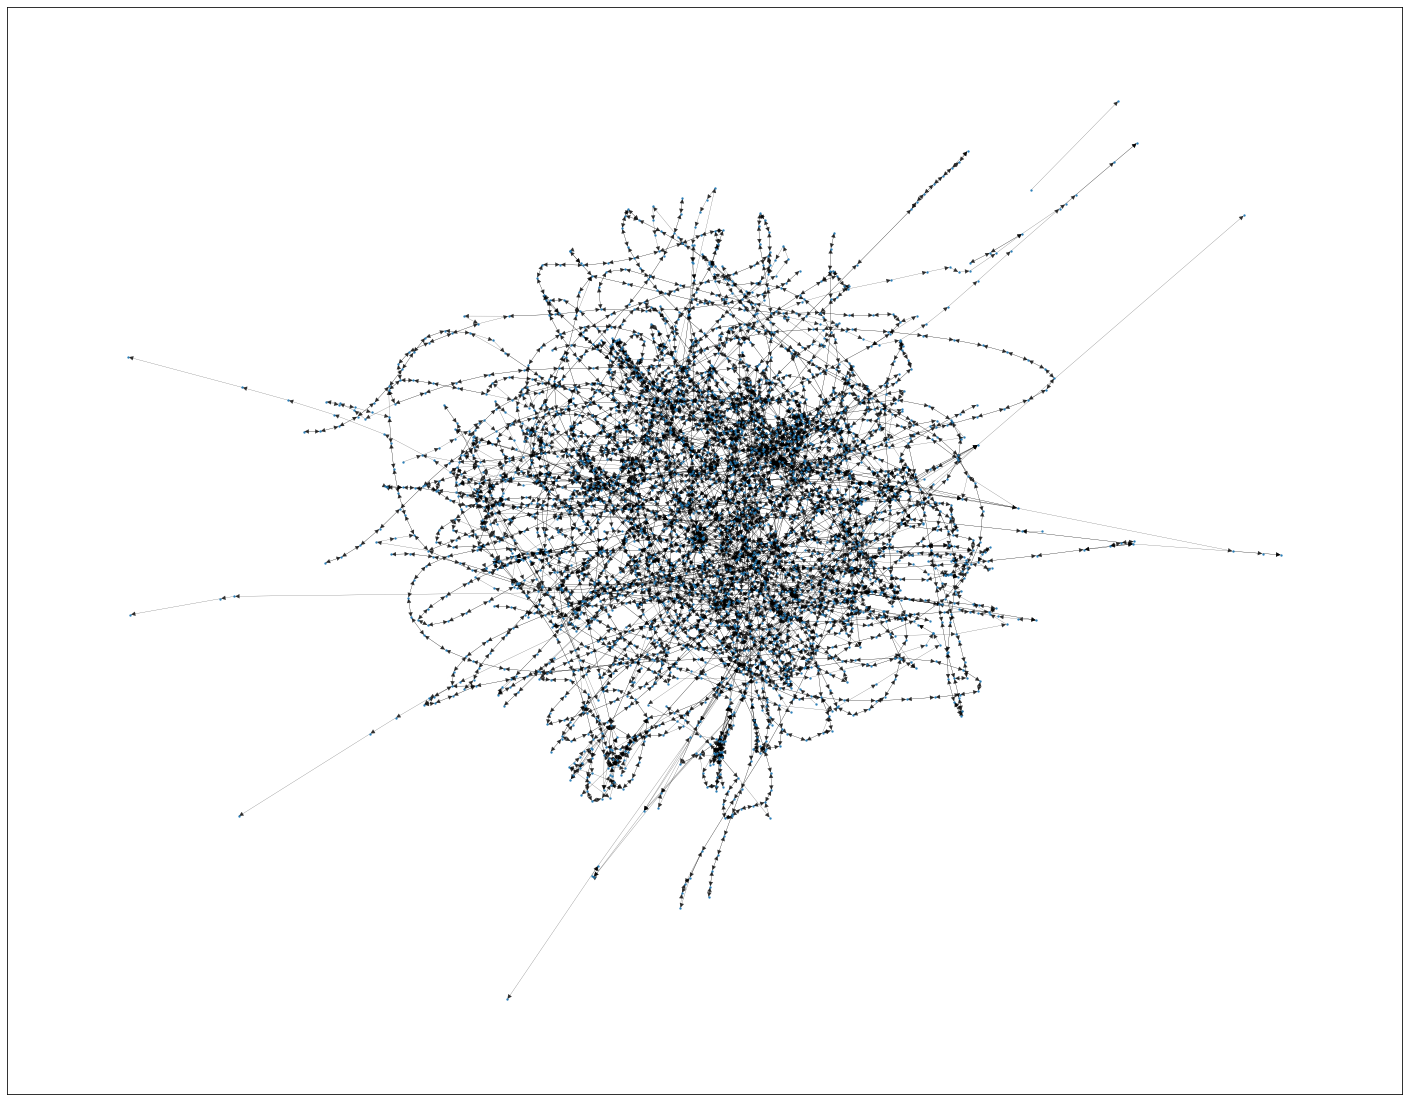

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(25, 20));
nx.draw_networkx(H, ax=ax, with_labels=False,node_size=2,alpha=0.8,width=0.2)

#### 2. Establish methods for algorithms

MINCUT-MAXFLOW: The function __minimum_cut()__ returns cut_value that is the total weight of all cutting edges, as well as 2 sets of nodes each of them is a partition that contains the "s" or the "t" from which you can easily compute the edge_cut.

In [9]:
import numpy as np
import pandas as pd

def hasPath(s,t):
    return nx.has_path(H,s,t)

def shortestPath(s,t):
    return nx.shortest_path(H,s,t,weight='a')

def mincut(s,t):
    cut_value, [reachable, non_reachable] = nx.minimum_cut(H,s,t, capacity='a')
    return [cut_value, len(reachable), len(non_reachable)]

#### 3. Execute MINCUT-MAXFLOW algorithm from central station to all nodes in the network

In [7]:
def mincutFromAllNodes(sink_input_id):
    vals = []
    sink_id=stops[str(sink_input_id)]['stop_id']
    sink_name=stops[str(sink_input_id)]['stop_name']
    sink_lon=stops[str(sink_input_id)]['stop_lon']
    sink_lat=stops[str(sink_input_id)]['stop_lat']
    for node in H.nodes():
        if node != sink_input_id:
            source_id=stops[str(node)]['stop_id']
            source_name=stops[str(node)]['stop_name']
            source_lon=stops[str(node)]['stop_lon']
            source_lat=stops[str(node)]['stop_lat']
            print(round(mincut(sink_input_id,node)[0],4),"\t",mincut(sink_input_id,node)[1],"\t",mincut(sink_input_id,node)[2],"\t",source_id,source_name,sink_id,sink_name)
            vals.append((mincut(sink_input_id,node)[0],mincut(sink_input_id,node)[1],mincut(sink_input_id,node)[2],source_id,source_name,source_lon,source_lat,sink_id,sink_name,sink_lon,sink_lat))
    output = np.array(vals, dtype=str)
    pd.DataFrame(output).to_csv("./mincut_values_to_" + sink_id +".csv",index=False,header=['cut_value','reachable','non_reachable','source_id','source_name','source_lon','source_lat','sink_id','sink_name','sink_lon','sink_lat'])


In [10]:
mincutFromAllNodes(9022003700600)

1.2545 	 3027 	 1 	 9022003799482 Karlsborg 9022003700600 Uppsala Centralstationen (Uppsala)
8.6565 	 3010 	 18 	 9022003780148 Solvallen (Uppsala) 9022003700600 Uppsala Centralstationen (Uppsala)
2.645 	 3027 	 1 	 9022003799481 Torsbro (Ramsta) 9022003700600 Uppsala Centralstationen (Uppsala)
2.728 	 3026 	 2 	 9022003780851 Vissgärde (Uppsala) 9022003700600 Uppsala Centralstationen (Uppsala)
80.5415 	 2947 	 81 	 9022003780367 Ramsta kyrka (Uppsala) 9022003700600 Uppsala Centralstationen (Uppsala)
0.6084 	 3023 	 5 	 9022003799480 Fullerö hage Skolhållplats 9022003700600 Uppsala Centralstationen (Uppsala)
36.1567 	 3022 	 6 	 9022003780599 Östaladan (Uppsala) 9022003700600 Uppsala Centralstationen (Uppsala)
1.18 	 3027 	 1 	 9022003799010 Funbo Sommarro 9022003700600 Uppsala Centralstationen (Uppsala)
36.4835 	 2835 	 193 	 9022003780444 Funbo kyrka (Uppsala) 9022003700600 Uppsala Centralstationen (Uppsala)
1.3787 	 3024 	 4 	 9022003780134 Marielunds gård (Uppsala) 9022003700600 Up

KeyboardInterrupt: 

#### X. Computing the average degree connectivity of the graph.

The average degree connectivity is the average nearest neighbor degree of nodes with degree k. For weighted graphs, an analogous measure is computed using the weighted average neighbors degree.

In [49]:
nx.k_nearest_neighbors(H,'in+out','in+out',weight='a')

{2: 2.4672023137530177,
 9: 3.224797061013991,
 4: 2.690590334544085,
 5: 3.307009610920636,
 7: 3.474515012799073,
 13: 4.114950728276256,
 6: 3.8492849489603422,
 8: 3.8925991453181568,
 14: 7.229046794091129,
 10: 3.627162312958644,
 37: 3.0959056499210496,
 12: 5.53815962949278,
 15: 4.256128187725079,
 3: 2.2447156583597403,
 11: 4.22422563283959,
 22: 5.015754654621449,
 1: 2.8887861144525186,
 19: 3.7301644626725565,
 28: 3.158386124247803,
 20: 3.3674846702805685,
 17: 3.040184422923833,
 18: 4.004449276219838,
 16: 3.360466264596977}

#### Y. Compute load centrality for nodes.

The load centrality of a node is the *fraction of all shortest paths* that pass through that node.

In [69]:
load_centrality = nx.load_centrality(H,weight='a')
betweenness_centrality = nx.betweenness_centrality(H,weight='a')